<font size="7">Programming Project</font>  

**About the Exam Questions**

*   The exam consists of two main problems.
*   You must answer all questions.
*   The total score is 100 points, and the point value for each problem is indicated in parentheses at the end of the question.。

**Submission Materials**

*   This .ipynb file
*   The y_pred.npy file output from Problem 2

**Notes**

*   You may refer to the lecture slides and exercise materials used in class as needed.
*   Web searches are allowed, but any communication with others via chat tools, email, etc., is strictly prohibited.
*   The use of generative AI (including Colab AI) is prohibited.
*   Questions unrelated to the exam content (such as program errors) will be answered, but no support will be provided if you run the code in environments other than Google Colab.




# **Tutorial**

A brief recap of what was used in the lecture.
You may refer to it as needed.

## **Regression**

After generating simple artificial data, you will use a polynomial approximation model and perform regularization.

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.698e-02, tolerance: 8.448e-04
  model = cd_fast.enet_coordinate_descent(


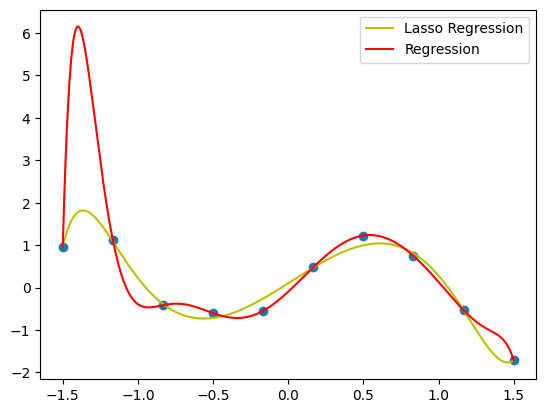

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import sklearn.linear_model as lm

%matplotlib inline

# Create data
n = 10 # number of samples
N = 1000
x = np.linspace(-1.5, 1.5, n)
X = np.linspace(-1.5, 1.5, N)

np.random.seed(99)

pix = np.pi * x
y_true = np.sin(np.pi*X)
y = np.sin(pix)  + 0.3 * np.random.randn(n)
x = x.reshape(-1, 1)
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

# Create a polynomial regression model
# Instantiate LinearRegression
model = LinearRegression()
# Instantiate PolynomialFeatures by specifying the maximum degree for polynomial approximation
polynomial_features= PolynomialFeatures(degree=12)
# For polynomial approximation, a matrix of shape "number of samples × (degree + 1)" is required
x_poly = polynomial_features.fit_transform(x)
X_poly = polynomial_features.fit_transform(X)
# Calculate coefficients b0–b8 for y = b0 + b1x + ... + b8x^8
model.fit(x_poly, y)
y_pred = model.predict(X_poly)

# Perform regularization and create a polynomial regression model
polynomial_features= PolynomialFeatures(degree=12)
lasso = lm.Lasso(alpha=0.005)
lasso.fit(x_poly, y)
y_lasso = lasso.predict(X_poly)

# Visualization
plt.scatter(x, y)
plt.plot(X, y_lasso, color='y', label='Lasso Regression')
plt.plot(X, y_pred, color='r', label='Regression')
plt.legend()
plt.show()

## **Classification and Validation**

When performing classification using a pipeline
(Cannot be executed because X_train and y_train are not defined)

In [17]:
# Define the pipeline
pipe = Pipeline([
    ('pca', PCA(n_components=2)),    # Dimensionality reduction
    ('lda', LinearDiscriminantAnalysis())  # LDA classifier
])

# Train using the pipeline
pipe.fit(X_train, y_train)
# Prediction
y_pred = pipe.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)

# **Question 1**

An experiment was conducted, and 13 samples were obtained. The data are listed below.

1.010112341428588

0.9517944743407984

0.20170779492006105

-0.10868425759626055

-0.907438272019164

-1.3023567892838062

-0.6698436592925099

0.4284983400788665

1.0167440683320423

0.5485778702988253

-0.03537092506357953

-0.971720109012771

-0.5686291415662077

Figure 1 shows a plot of this data.

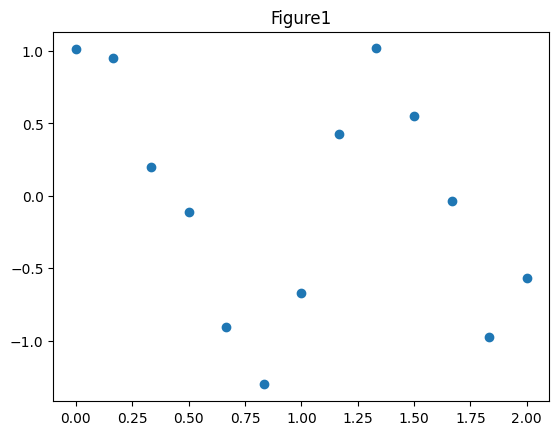

When this data is regressed using the polynomial approximation program below, Figure 2 is obtained as the output.

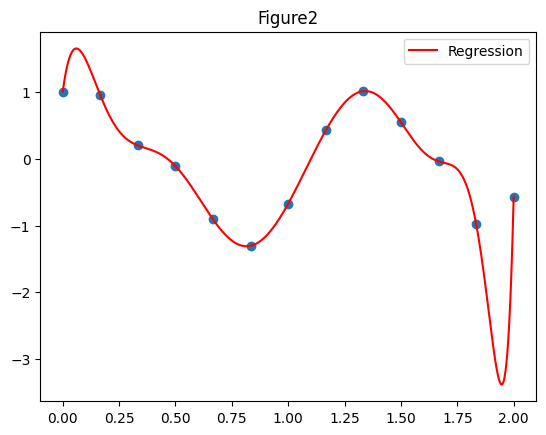

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

# Define the experimental data as an array y_data
y_data = [1.010112341428588, 0.9517944743407984, 0.20170779492006105, -0.10868425759626055, -0.907438272019164, -1.3023567892838062, -0.6698436592925099, 0.4284983400788665, 1.0167440683320423, 0.5485778702988253, -0.03537092506357953, -0.971720109012771, -0.5686291415662077]

# Define the number of data points
n = 13; N = 1000

# Define variables for analysis
x = np.linspace(0, 2, n)
X = np.linspace(0, 2, N)
x = x.reshape(-1, 1)
X = X.reshape(-1, 1)
y = np.array(y_data)

# Instantiate LinearRegression
model = LinearRegression()
# Instantiate PolynomialFeatures by specifying the maximum degree for polynomial approximation
polynomial_features= PolynomialFeatures(degree=14)
# For polynomial approximation, a matrix of "number of samples × (degree + 1)" is required, so create x_poly
x_poly = polynomial_features.fit_transform(x)
X_poly = polynomial_features.fit_transform(X)
# Calculate the coefficients of the approximated polynomial
model.fit(x_poly, y)
y_pred = model.predict(X_poly)
y_pred = y_pred.reshape(-1)

# Plot the graph
plt.title("Figure2")
plt.scatter(x, y)
plt.plot(X, y_pred, color='r', label='Regression')
plt.legend()
plt.show()

Based on these, answer the following two questions.

## **(1) Design of Regression Model**
For the data shown above, create a regression model (curve) that is considered to be close to the true model under the following conditions.

**Conditions**

*   Use polynomial approximation.
*   Examine the maximum polynomial degree in the range of 11–16.
*   If regularization is applied, choose the regularization coefficient from {0, 0.001, 0.005, 0.01, 0.05}.

**After the exam, the true data will be provided**. You must then calculate the variance of the difference between your model’s predictions and the true data, and record it in the text. (35 points)

You should write your code in the code cell immediately below.
You may use or modify the pre-written code as you like.

It is also acceptable to combine your approach with the solution method described in (2).



**Note 1: Grading will be based on both the implementation and the accuracy evaluated using the true data.**

**Note 2: Code written in any cell other than the one directly below will not be graded.**

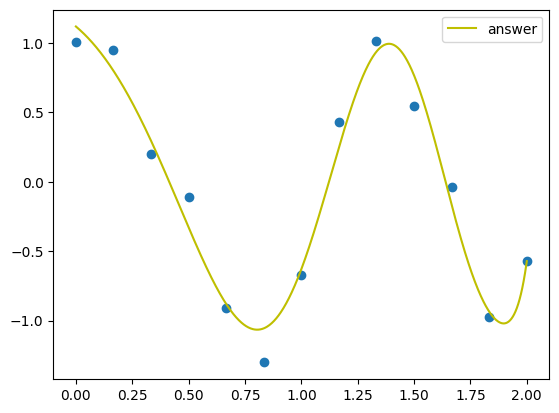

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import sklearn.linear_model as lm

# Implement the solution method described in (2) here ######
# If you store the analysis result in the variable y_ans, you won’t need to modify the following variables later.
# For the analysis result, input X_poly (e.g., .predict(X_poly)). If you use x_poly for prediction, an error will occur when displaying the variance.


polynomial_features= PolynomialFeatures(degree=14)
x_poly = polynomial_features.fit_transform(x)
X_poly = polynomial_features.fit_transform(X)

alpha = 0.005
ridge = lm.Ridge(alpha)
ridge.fit(x_poly, y)
y_ridge = ridge.predict(X_poly)

y_ans = y_ridge

####################################
y_ans = y_ans.reshape(-1)

# Plot the graph
plt.scatter(x, y)
plt.plot(X, y_ans, color='y', label='answer')
plt.legend()
plt.show()

### **Test Phase**

After the exam, the file answer_y.npy, which contains the true data, will be distributed.

**After uploading the file to Colab**, execute the code cell immediately below to calculate the variance, and record it as your accuracy.

In [6]:
true_data_path = '/content/answer_y.npy'
true_data = np.load(true_data_path)

y_var = np.var(true_data - y_ans)
print(f"The variance of your approximation result is {y_var}.")

The variance of your approximation result is 0.0019628258708823724.


＜＜Double-click and enter the displayed accuracy.＞＞

0.0019628258708823724

## **(2) Explanation of the Reason for Choosing the Model**
Explain how you interpreted the characteristics of the data and the features of the model you used to create your regression model. (5 points)

＜＜Double-click and enter your answer.＞＞

In this data model, it is necessary to use all features. However, Lasso regression (L1 regularization) shrinks some feature coefficients to zero, effectively performing feature selection. In contrast, Ridge regression (L2 regularization), which searches over a hyperspherical constraint, acts to attenuate parameters while retaining all features, thereby improving model stability. Furthermore, in high-dimensional situations such as the 14th-degree polynomial features used here, Ridge regression (L2 regularization) is considered effective for controlling overfitting and capturing complex nonlinear relationships.

# **Question 2**

Answer the following two questions.

## **(1) Development of a Classification Model**
Develop a machine learning model that can successfully distinguish between dog and horse images as shown in the figure below. (50 points)

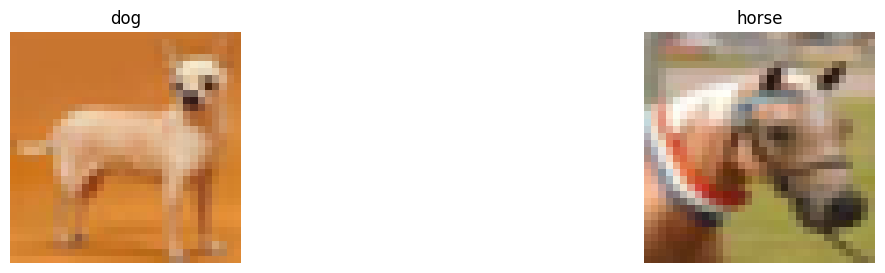

**Note 1**: Write your answer in the section labeled “Answer for Custom Model.”

**Note 2**: Use only the training and validation data contained in the file train_cifar10.npz.

**Note 3**: You may freely use or modify the code provided below, but importing any additional libraries is prohibited.

**Note 4**: After the exam, test data will be provided. Calculate the accuracy on the test data and record it in the text.

**Note 5**: Grading will be based on both your implementation and the accuracy on the test data.

**Target accuracy: 0.70 (accuracy on the test data)**

## **コーディング準備・コード例**

In [7]:
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Functions available for use in the allowed libraries
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

### **訓練データのダウンロード**

In [8]:
data_path = '/content/train_cifar10.npz' # # Download required
data = np.load(data_path)

X_train = data['X_train']
X_train_vis = data['X_train_vis'] # For visualization, used in def visualize_images() and def plot_incorrect_predictions()
y_train = data['y_train']

print(X_train.shape) # (number of samples, number of features (32 * 32 * 3))
print(y_train.shape) # (number of samples)

(1000, 3072)
(1000,)


### **Definition of functions used to check the data**

In [9]:
# Function to display images (the number is determined by num_images)
def visualize_images(X, y, num_images=10):
    """
    X: image data (n_samples, 32, 32, 3)
    y: label data (n_samples,)
    num_images: number of images to display
    """
    cifar10_labels = {
        5: 'dog',
        7: 'horse',
    }
    # Output 10 images starting from start_index
    start_index = 10
    plt.figure(figsize=(15, 3))
    for i in range(start_index, num_images + start_index):
        ax = plt.subplot(1, num_images, i - start_index  + 1)
        img = X[i]
        plt.imshow(img)
        plt.title(cifar10_labels[y[i]])
        plt.axis('off')
    plt.show()

# Function to display images of incorrect predictions
def plot_incorrect_predictions(X_vis,X_t, y_t, model_pipe):
    cifar10_labels = {
          5: 'dog',
          7: 'horse',
      }
    # Obtain prediction results
    y_pred = model_pipe.predict(X_t)
    # Output 15 images starting from start_index
    start_index = 0
    # Get indices of incorrect predictions
    incorrect_indices = [i for i, (true, pred) in enumerate(zip(y_t, y_pred)) if true != pred]

    print(f"Incorrect indices: {incorrect_indices[start_index:start_index + 15]}")
    print(f"The number of incorrect predictoins : {len(incorrect_indices)}")

    # Visualize images of incorrect predictions
    fig, axs = plt.subplots(3, 5, figsize=(20, 10))

    for i, idx in enumerate(incorrect_indices[start_index:start_index + 15]):
        row, col = divmod(i, 5)  # Calculate subplot position in a 3x5 grid
        img_data = X_vis[idx]
        axs[row, col].imshow(img_data)
        axs[row, col].set_title(f'Index: {idx}\nTrue: {cifar10_labels.get(y_t[idx], "unknown")}, '
                                f'Pred: {cifar10_labels.get(y_pred[idx], "unknown")}')
        axs[row, col].axis('off')

    plt.tight_layout()
    plt.show()

### **Visualization**

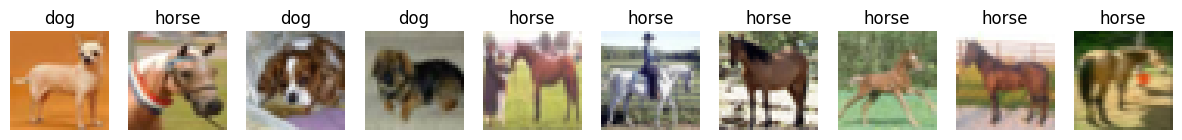

In [ ]:
visualize_images(X_train_vis, y_train, num_images=10)

### **Classification and Validation**

In [10]:
# Performed LDA after splitting the given data into 80% training data and 20% validation data
# To generalize performance, devise not only the classification method but also the validation method.

x_train_data, x_val_data, y_train_data, y_val_data = train_test_split(X_train, y_train,test_size=0.2, random_state=42)
clf = LinearDiscriminantAnalysis()
clf.fit(x_train_data, y_train_data)
pred = clf.predict(x_val_data)
print('acc: lda', accuracy_score(y_val_data, pred))

acc: lda 0.65


In [12]:
# Results of applying k-fold cross-validation (k=5) to a model that performs LDA after dimensionality reduction by PCA
pipe = Pipeline([
    ('pca', PCA(n_components=10)),
    ('lda', LinearDiscriminantAnalysis())
])
scores = cross_val_score(pipe, X_train, y_train, cv=5)
print("Average accuracy: ",sum(scores)/len(scores))

# Since fit is not executed within cross_val_score, the model must be fitted afterward.
pipe.fit(X_train, y_train)

Average accuracy:  0.6609999999999999


Pipeline(steps=[('pca', PCA(n_components=10)),
                ('lda', LinearDiscriminantAnalysis())])

### **Display of images from the training data that were misclassified**

Incorrect indices: [2, 3, 6, 11, 12, 13, 14, 16, 17, 19, 24, 26, 27, 31, 32]
The number of incorrect predictoins : 333


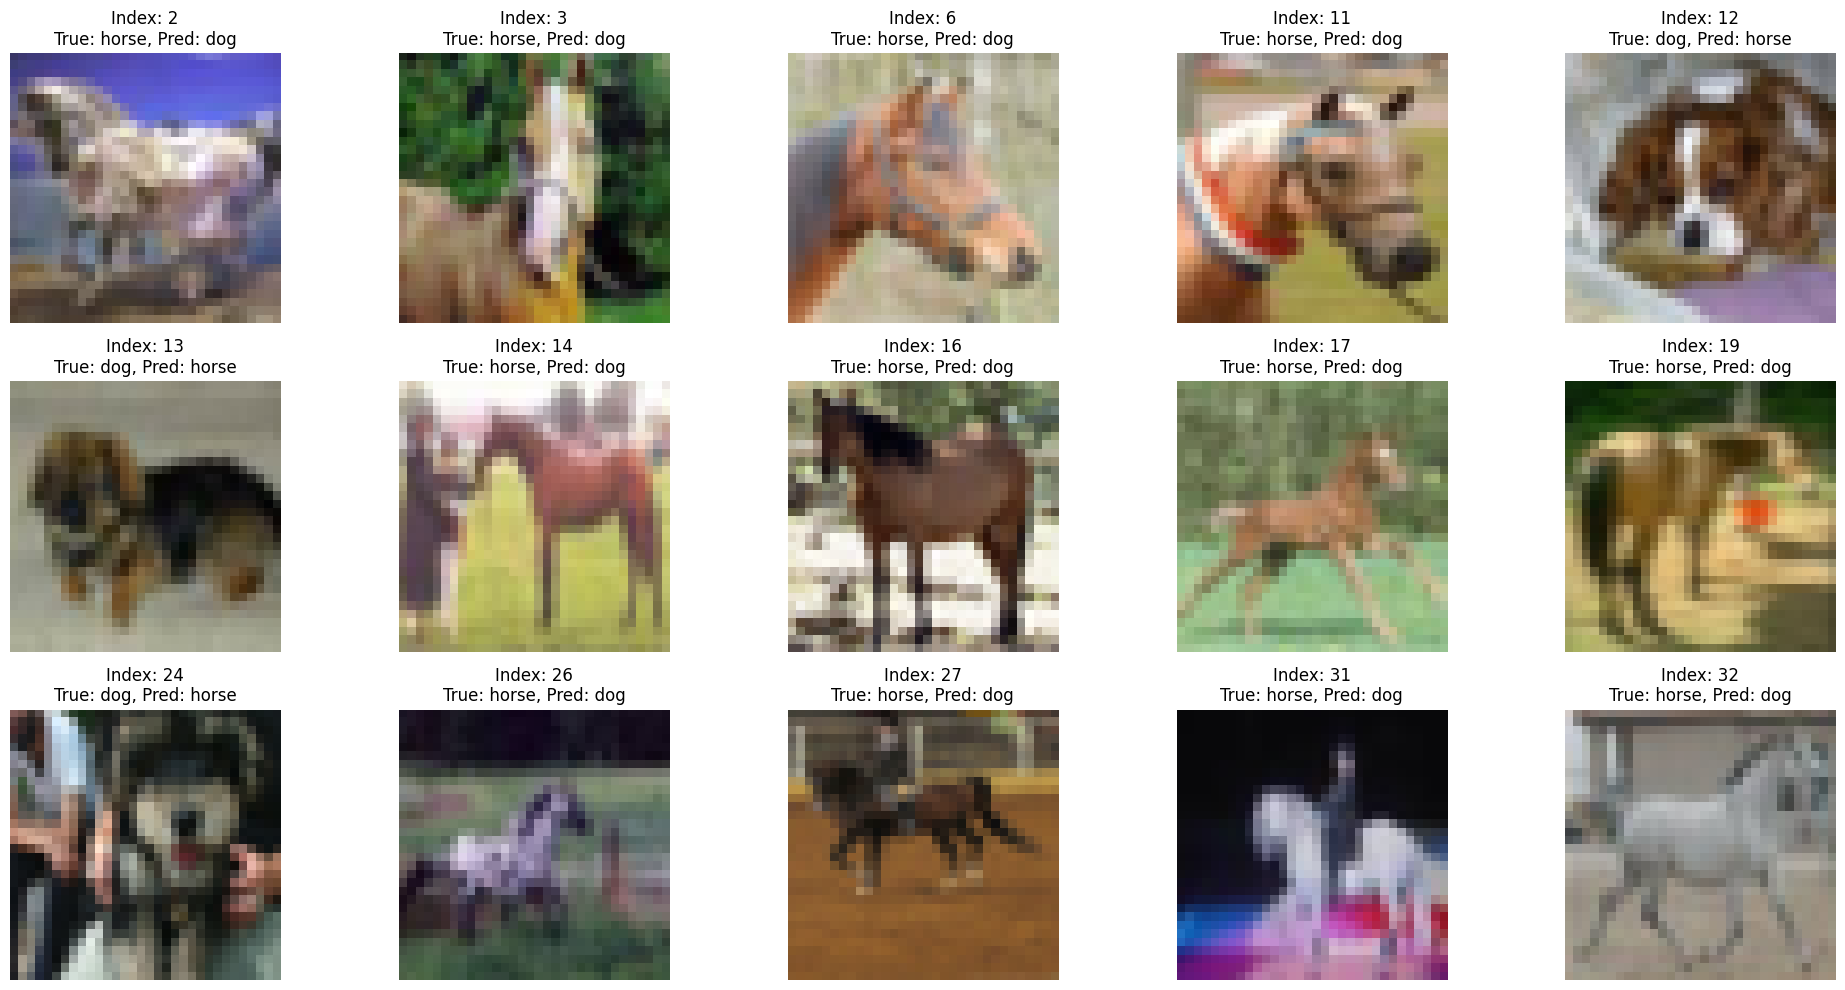

In [13]:
plot_incorrect_predictions(X_train_vis, X_train ,y_train, pipe) # The fourth argument should contain the model after fitting.

## **Creation and Validation of a Custom Model**

[PCA components=10] Cross Validation accuracy: 0.7043 [0.73571429 0.74285714 0.68571429 0.64285714 0.71428571]
[PCA components=15] Cross Validation accuracy: 0.7400 [0.77857143 0.73571429 0.70714286 0.70714286 0.77142857]
[PCA components=20] Cross Validation accuracy: 0.7557 [0.76428571 0.73571429 0.79285714 0.70714286 0.77857143]
[PCA components=25] Cross Validation accuracy: 0.7657 [0.79285714 0.72857143 0.78571429 0.72857143 0.79285714]
[PCA components=30] Cross Validation accuracy: 0.7729 [0.8        0.72857143 0.77857143 0.75       0.80714286]
[PCA components=35] Cross Validation accuracy: 0.7700 [0.80714286 0.75       0.78571429 0.74285714 0.76428571]
[PCA components=40] Cross Validation accuracy: 0.7600 [0.81428571 0.70714286 0.75       0.73571429 0.79285714]
[PCA components=45] Cross Validation accuracy: 0.7543 [0.78571429 0.72142857 0.75714286 0.72142857 0.78571429]
[PCA components=50] Cross Validation accuracy: 0.7657 [0.82857143 0.72142857 0.75714286 0.74285714 0.77857143]
[

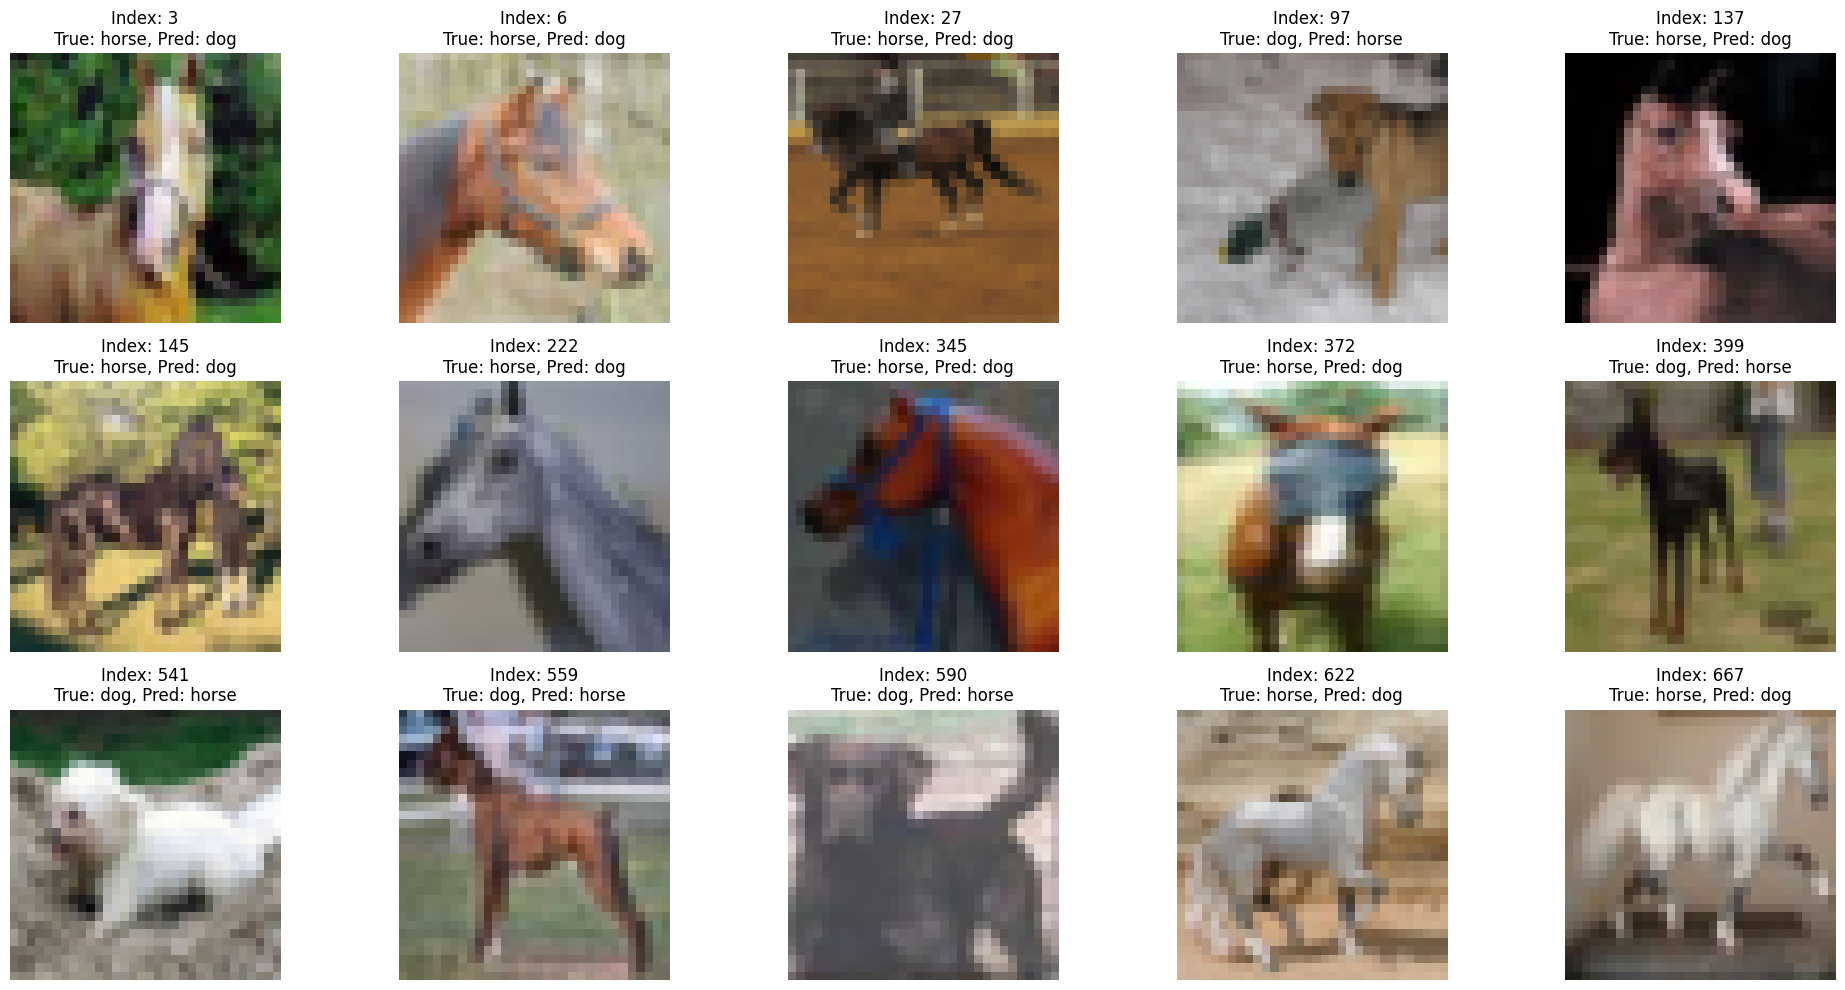

In [14]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

# Load training data
data = np.load('train_cifar10.npz')
X_train = data['X_train']
y_train = data['y_train']

# Split the dataset
x_train_data, x_val_data, y_train_data, y_val_data = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# Select classifier model
use_qda = True  # Set to False to compare with KNN
cv = 5  # Number of folds for cross-validation

# Initialize optimal parameters
best_n_components = -1
best_score = -1
models = {}

# Try different numbers of PCA components
for n_components in range(10, 100, 5):
    # Define the classification pipeline
    model = QuadraticDiscriminantAnalysis() if use_qda else KNeighborsClassifier(n_neighbors=n_components)
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=n_components)),
        ('classifier', model)
    ])

    # Evaluate the model using cross-validation
    scores = cross_val_score(pipe, x_train_data, y_train_data, cv=cv)
    mean_score = scores.mean()
    print(f'[PCA components={n_components}] Cross Validation accuracy: {mean_score:.4f} {scores}')

    # Update optimal parameters
    if mean_score > best_score:
        best_n_components = n_components
        best_score = mean_score

    # Save the current model
    models[n_components] = pipe

# Output the best parameters and best cross-validation score
print(f'Best PCA components: {best_n_components}, Best CV accuracy: {best_score:.4f}')

# Train the final model with the optimal number of PCA components
best_model = models[best_n_components]
best_model.fit(X_train, y_train)

# Evaluate performance on the validation set
y_pred = best_model.predict(x_val_data)
val_accuracy = accuracy_score(y_val_data, y_pred)
print(f'Validation accuracy: {val_accuracy:.4f} (Best PCA components={best_n_components}, CV accuracy={best_score:.4f})')

# Plot misclassified images (assuming plot_incorrect_predictions function is already defined)
plot_incorrect_predictions(X_train_vis, X_train, y_train, best_model)






### **Test Phase**

After the exam, the file test_cifar10.npz, which contains the test data, will be distributed.

**After uploading the file to Colab**, execute the code cell immediately below to calculate the accuracy on the test data and record it.

Then, save the result of the accuracy calculation as a file and submit the following two items via T2SCHOLA:

1. The accuracy result file
2. This Jupyter Notebook file containing your implemented code

In [15]:
data_path = '/content/test_cifar10.npz'
data = np.load(data_path)

X_test = data['X_test']
X_test_vis = data['X_test_vis']
y_test = data['y_test']

model = models[best_n_components]  # Optimal model
model.fit(X_train, y_train)
"""
例
model = clfs[k]
model.fit(X_train, y_train)
"""
pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, pred)
print(f'Test Accuracy={test_accuracy:.4f}')


Test Accuracy=0.7700


In [16]:
#Save the results
np.save('/content/y_pred.npy', pred)

**＜＜Double-click and enter the displayed accuracy.＞＞**

0.7700

## **(2) Explanation of the Reason for Choosing the Model and Validation Method**

Briefly explain how you interpreted the characteristics of the data, the features of the model used, and the validation method when creating your classification model. (10 points)


**＜＜Double-click to enter your answer＞＞**


 **Answer Section**

In Question 2, a classification task using the CIFAR-10 image dataset was required, and it was necessary to compare model performance under different parameters. Therefore, I selected and analyzed two widely used classification methods: QDA and KNN.

*   Since CIFAR-10 is a high-dimensional image dataset containing rich feature information, QDA is suitable for handling data with nonlinear decision boundaries and can better capture complex inter-class distributions even after dimensionality reduction with PCA. For this reason, I considered QDA to be more appropriate for this task than KNN.
*   From a computational efficiency perspective, cross-validation was used when evaluating model performance under different parameters. QDA has few hyperparameters that require tuning, making it easy to optimize. Moreover, after dimensionality reduction, it tends to ignore irrelevant features, improving generalization performance and showing stable results on both training and test data. In contrast, KNN requires testing multiple k values, and in high-dimensional and complex datasets, it may be difficult to find accurate nearest neighbors, which can reduce generalization performance.
*   Reason for using cross-validation: since cross-validation repeatedly evaluates the model over multiple data splits, it prevents dependence on a specific data partition and enhances model stability and reliability.


--------------------------------------------------------------------------------